In [1]:
import os
import sys
sys.path.insert(0, os.path.realpath('__file__'))

import numpy as np
import matplotlib.pyplot as plt
import pickle
import pyidi

%load_ext autoreload
%autoreload 2
%matplotlib inline

Specify the `.cih` file that has the same name as `.mraw` file with images:

In [2]:
filename = 'data/data_showcase.cih'

Make an instance of `pyIDI` class:

In [3]:
video = pyidi.pyIDI(filename)

c:\Users\kristofc\Anaconda3\lib\site-packages\pyMRAW.py:91: UserWarning: Not 12bit (8 bits)! clipped values?
  warnings.warn('Not 12bit ({:g} bits)! clipped values?'.format(bits))
c:\Users\kristofc\Anaconda3\lib\site-packages\pyMRAW.py:103: UserWarning: Clipped footage! (Total frame: 75, Original total frame: 15000)
  warnings.warn('Clipped footage! (Total frame: {}, Original total frame: {})'.format(cih['Total Frame'], cih['Original Total Frame'] ))


Information about video can be found in `.info` attribute and images are stored in `.mraw` attribute:

In [4]:
video.info

{'Date': '2018/12/17',
 'Time': '12:48',
 'Camera Type': 'FASTCAM SA-Z type 2100K-M-64GB',
 'Head Type': 'Unknown Child Device',
 'Camera ID': 11,
 'Camera Number': 0,
 'Head Number': 1,
 'Max Head Number': 1,
 'Scene Name': '',
 'User Defined Camera Name': '',
 'Session Number': '',
 'Date Record': 'Unknown',
 'Time Record': 'Unknown',
 'Trigger Time': 0,
 'Record Rate(fps)': 15000,
 'Shutter Speed(s)': '1/15371',
 'Trigger Mode': 'Start',
 'Original Total Frame': 15000,
 'Total Frame': 75,
 'Start Frame': 0,
 'Correct Trigger Frame': 0,
 'Save Step': 100,
 'Image Width': 640,
 'Image Height': 40,
 'Color Type': 'Mono',
 'Color Bit': 8,
 'File Format': 'MRaw',
 'EffectiveBit Depth': 12,
 'EffectiveBit Side': 'Higher',
 'Digits Of File Number': 6,
 'Device Last Error': '-1:0xffffffff',
 'Comment Text': '',
 'AnalogBoard Channel Num': 0,
 'Zero Frame': 'Exist',
 'Shutter Type2(nsec)': 65060,
 'Edge Enhance': 0,
 'Pre LUT Mode': 'DEF1',
 'Pre LUT Brightness': 0,
 'Pre LUT Contrast': 0,
 

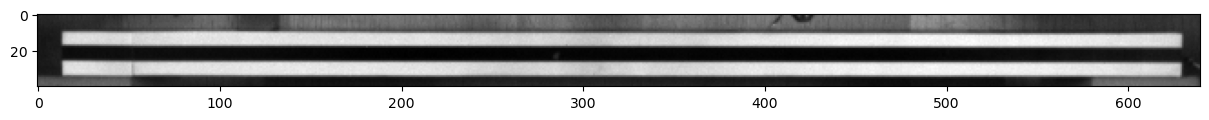

In [5]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(video.mraw[0], 'gray')

Points where the displacements will be identified must be determined. Chosen points must have high gradient value.

In [6]:
reference_image = np.average(video.mraw[:10], axis=0)

grad0, grad1 = np.gradient(reference_image)

In [7]:
inds = np.array([[ 8,  20],
               [ 8, 620],
               [ 26, 620],
               [ 26, 20]])

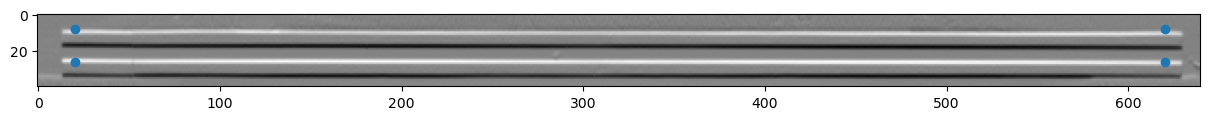

In [8]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(grad0, 'gray')
ax.scatter(inds[:, 1], inds[:, 0])

Setting the points and method to be used:

In [9]:
video.set_points(points=inds)
video.set_method('sof')

In [10]:
video.method.configure(subset_size=3) # Configuring the arguments

If the `points` argument is not given and the `method` is supplied to `set_points`, the `get_points` method is triggered. 

`kwargs` can be passed to `get_points`.

In [11]:
# video.set_points(method='simplified_optical_flow', subset=(20, 20), axis=0)

The displacements are identified by calling `get_displacements`

In [12]:
displacements = video.get_displacements()

100%|█████████████████████████████████████████████████████████████| 75/75 [00:00<00:00, 1663.72it/s]
c:\Users\kristofc\Doktorat\Projekti\pyidi\pyidi\methods\_simplified_optical_flow.py:140: UserWarning: Displacement larger than 0.5 pixel
  warnings.warn('Displacement larger than 0.5 pixel')


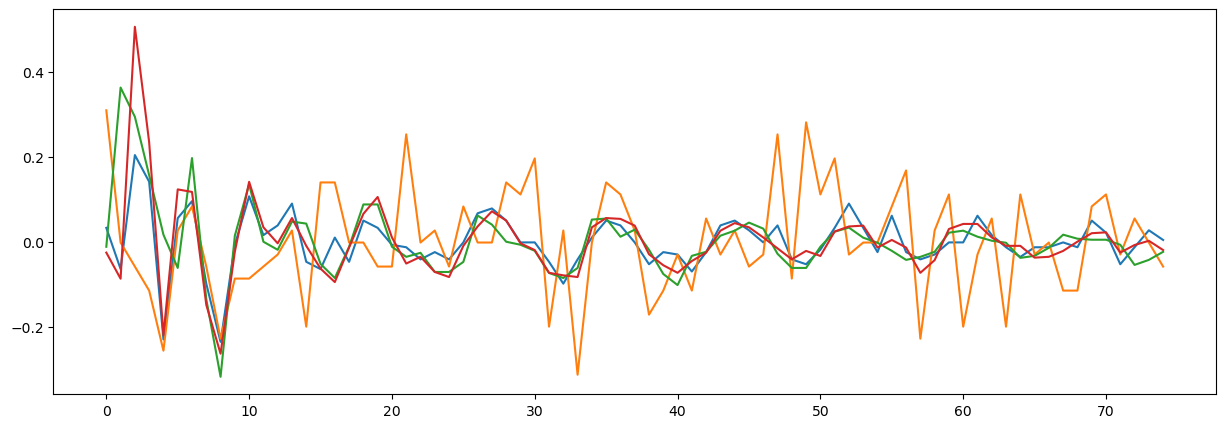

In [13]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(displacements[:, :, 0].T);

In [14]:
displacements = np.array([[10,10], [10,10], [10,10], [10,10]])

pyidi.postprocessing.motion_magnification(video, displacements, 10)

(20.0, 20.0, 8.0, 14.0)